In [69]:
!pip3 install ta

In [70]:
!pip3 install yfinance

In [71]:
import yfinance as yf
import numpy as np 
import ta
import pandas as pd
import datetime 
from dateutil import parser

In [376]:
#parameter
code = 'PGAS.JK'
code_only = code.replace('.JK','')
filebuysell = '20220511 yx-buy-sell.csv'
data_interval = '1m'
start_date = "2022-05-08 16:00:00.00 +0700"
end_date = "2022-05-11 16:00:00.00 +0700"


dt_start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S.%f %z')
dt_end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S.%f %z')



In [377]:
# ************* reading stock
# we chose a 1 minute interval here, but you may play around with the arguments
df = yf.download(code, start=dt_start_date, end=dt_end_date, interval=data_interval)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-05-09 09:00:00+07:00,1475.0,1490.0,1475.0,1485.0,1485.0,4667200
2022-05-09 09:01:00+07:00,1485.0,1495.0,1485.0,1485.0,1485.0,3369300
2022-05-09 09:02:00+07:00,1490.0,1490.0,1475.0,1480.0,1480.0,13815300
2022-05-09 09:03:00+07:00,1480.0,1480.0,1470.0,1475.0,1475.0,5279200
2022-05-09 09:04:00+07:00,1475.0,1480.0,1465.0,1470.0,1470.0,2825300
...,...,...,...,...,...,...
2022-05-11 15:10:00+07:00,1520.0,1520.0,1520.0,1520.0,1520.0,2000
2022-05-11 15:11:00+07:00,1520.0,1520.0,1520.0,1520.0,1520.0,85900
2022-05-11 15:12:00+07:00,1520.0,1520.0,1520.0,1520.0,1520.0,1300


In [378]:
# ********** Reading buy sell

buysell_df = pd.read_csv(filebuysell)
buysell_df['updated_at']= pd.to_datetime(buysell_df['updated_at'])
buysell_df['transaction'] = buysell_df['updated_at'].dt.tz_localize('UTC+0700') # convert to Jakarta timezone
buysell_df['transaction'] = buysell_df['transaction'].dt.floor('Min')


buysell_df


,_id,account,board,created_at,order_date,order_status,order_time,price,side,symbol,updated_at,transaction
0,61f21590dc0fc4725f9a12f4,D001001,RG,2022-01-28 13:36:51,20220127,M,104624,7500,B,BMRI,2022-01-28 13:38:04,2022-01-28 13:38:00+07:00
1,61f24a4eb5c3fc82b7d52620,D001001,RG,2022-01-28 13:21:40,20220127,M,143350,2900,B,PTBA,2022-01-28 13:21:46,2022-01-28 13:21:00+07:00
2,61f24b7c55eb7220e52b7d4a,D001001,RG,2022-01-28 13:19:27,20220127,M,143851,22125,B,ITMG,2022-01-28 13:19:32,2022-01-28 13:19:00+07:00
3,61f25133d6c628bf5410d99d,D001001,RG,2022-01-28 13:17:37,20220127,M,150051,900,B,BRPT,2022-01-28 13:17:42,2022-01-28 13:17:00+07:00
4,61f362d283866f660fad3a3f,D001001,RG,2022-01-28 13:20:58,20220128,M,102818,2410,B,MIKA,2022-01-28 13:21:02,2022-01-28 13:21:00+07:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1161,627b5df3169e4f56f3ed5f02,D001001,RG,2022-05-11 13:55:47,20220511,M,135547,2630,B,SGER,2022-05-11 13:55:47,2022-05-11 13:55:00+07:00
1162,627b5f18e19886b25834a06e,D001001,RG,2022-05-11 14:00:40,20220511,M,140040,715,B,TAPG,2022-05-11 14:00:40,2022-05-11 14:00:00+07:00
1163,627b61fbd0676e0e64b17912,D001001,RG,2022-05-11 14:13:00,20220511,M,141259,4830,B,UNVR,2022-05-11 14:13:00,2022-05-11 14:13:00+07:00
1164,627b640a62759066a5febdb4,D001001,RG,2022-05-11 14:21:46,20220511,M,142146,1825,B,MYOR,2022-05-11 14:21:46,2022-05-11 14:21:00+07:00


In [379]:
trx_df = buysell_df[buysell_df['symbol'] == code_only] 
trx_df = trx_df[trx_df['updated_at'] > '2022-05-10'] 
trx_df

,_id,account,board,created_at,order_date,order_status,order_time,price,side,symbol,updated_at,transaction
1131,6279c80d12d39dc47dba06d9,D001001,RG,2022-05-10 09:03:58,20220510,M,90357,1420,S,PGAS,2022-05-10 09:03:58,2022-05-10 09:03:00+07:00
1133,6279eba79ee30f7c68ba06da,D001001,RG,2022-05-10 13:30:01,20220510,M,113550,1505,B,PGAS,2022-05-10 13:30:01,2022-05-10 13:30:00+07:00
1158,627b3543ce757494e1beb34c,D001001,RG,2022-05-11 11:02:12,20220511,M,110211,1530,B,PGAS,2022-05-11 11:02:12,2022-05-11 11:02:00+07:00


In [380]:
buy_df = trx_df[trx_df['side'] == 'B'] 
buy_df

,_id,account,board,created_at,order_date,order_status,order_time,price,side,symbol,updated_at,transaction
1133,6279eba79ee30f7c68ba06da,D001001,RG,2022-05-10 13:30:01,20220510,M,113550,1505,B,PGAS,2022-05-10 13:30:01,2022-05-10 13:30:00+07:00
1158,627b3543ce757494e1beb34c,D001001,RG,2022-05-11 11:02:12,20220511,M,110211,1530,B,PGAS,2022-05-11 11:02:12,2022-05-11 11:02:00+07:00


In [381]:
sell_df = trx_df[trx_df['side'] == 'S'] 
sell_df

,_id,account,board,created_at,order_date,order_status,order_time,price,side,symbol,updated_at,transaction
1131,6279c80d12d39dc47dba06d9,D001001,RG,2022-05-10 09:03:58,20220510,M,90357,1420,S,PGAS,2022-05-10 09:03:58,2022-05-10 09:03:00+07:00


In [382]:
import matplotlib.pyplot as plt 

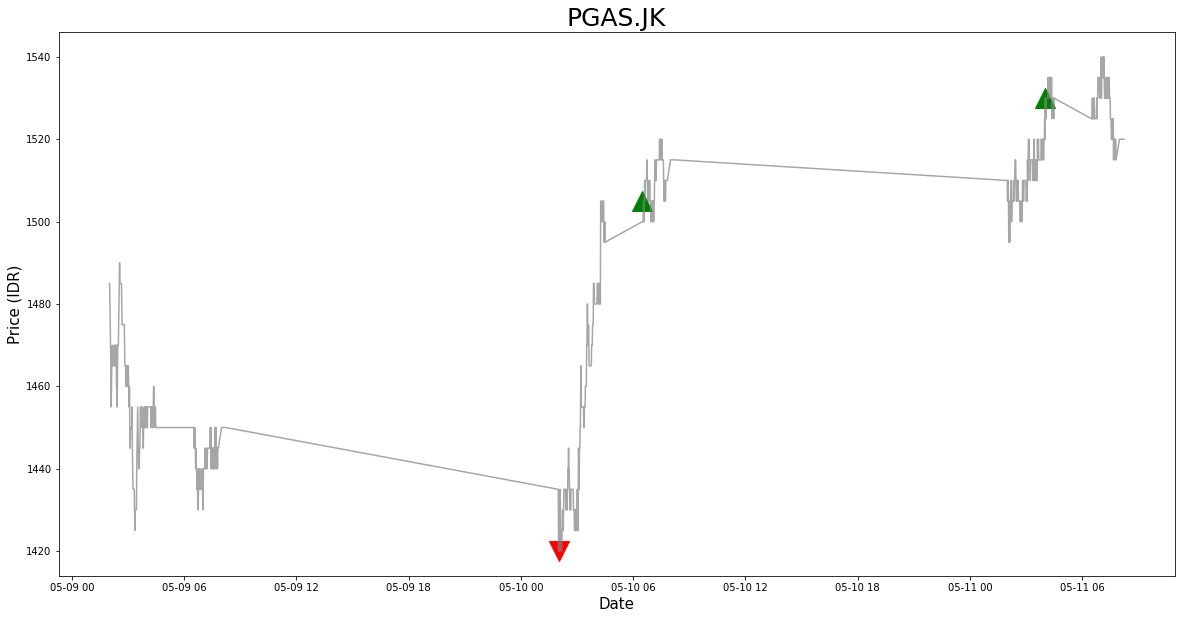

In [383]:
plt.figure(figsize=(20,10))
plt.plot(df.Close, color='grey',alpha=0.7)
# plt.scatter(actuals.Buying_dates, df.Open[actuals.Buying_dates], marker='^', color='g', s=400)
# plt.scatter(actuals.Selling_dates, df.Open[actuals.Selling_dates], marker='v', color='r', s=400)
plt.scatter(buy_df['transaction'], buy_df['price'], marker='^', color='g', s=400)
plt.scatter(sell_df['transaction'], sell_df['price'], marker='v', color='r', s=400)

#plt.scatter(sell_df['transaction'], df.Open[buy_df['transaction']], marker='v', color='r', s=400)


plt.title(label= code,fontsize=25)
plt.ylabel(ylabel= 'Price (IDR)', fontsize=15)
plt.xlabel(xlabel='Date', fontsize=15)
plt.show()